# K- Nearest Neighbour
Iris dataset

In [102]:
# All imports
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
from typing import Counter
from numpy._core.fromnumeric import sort

In [103]:
# Load the dataset
iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species_id'] = iris_data.target
df['species'] = df['species_id'].map({i: name for i, name in enumerate(iris_data.target_names)})

# Analyze the Iris dataset
# EDA - Exploratory Data Analysis

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_id         150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [105]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [106]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [107]:
print(df['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


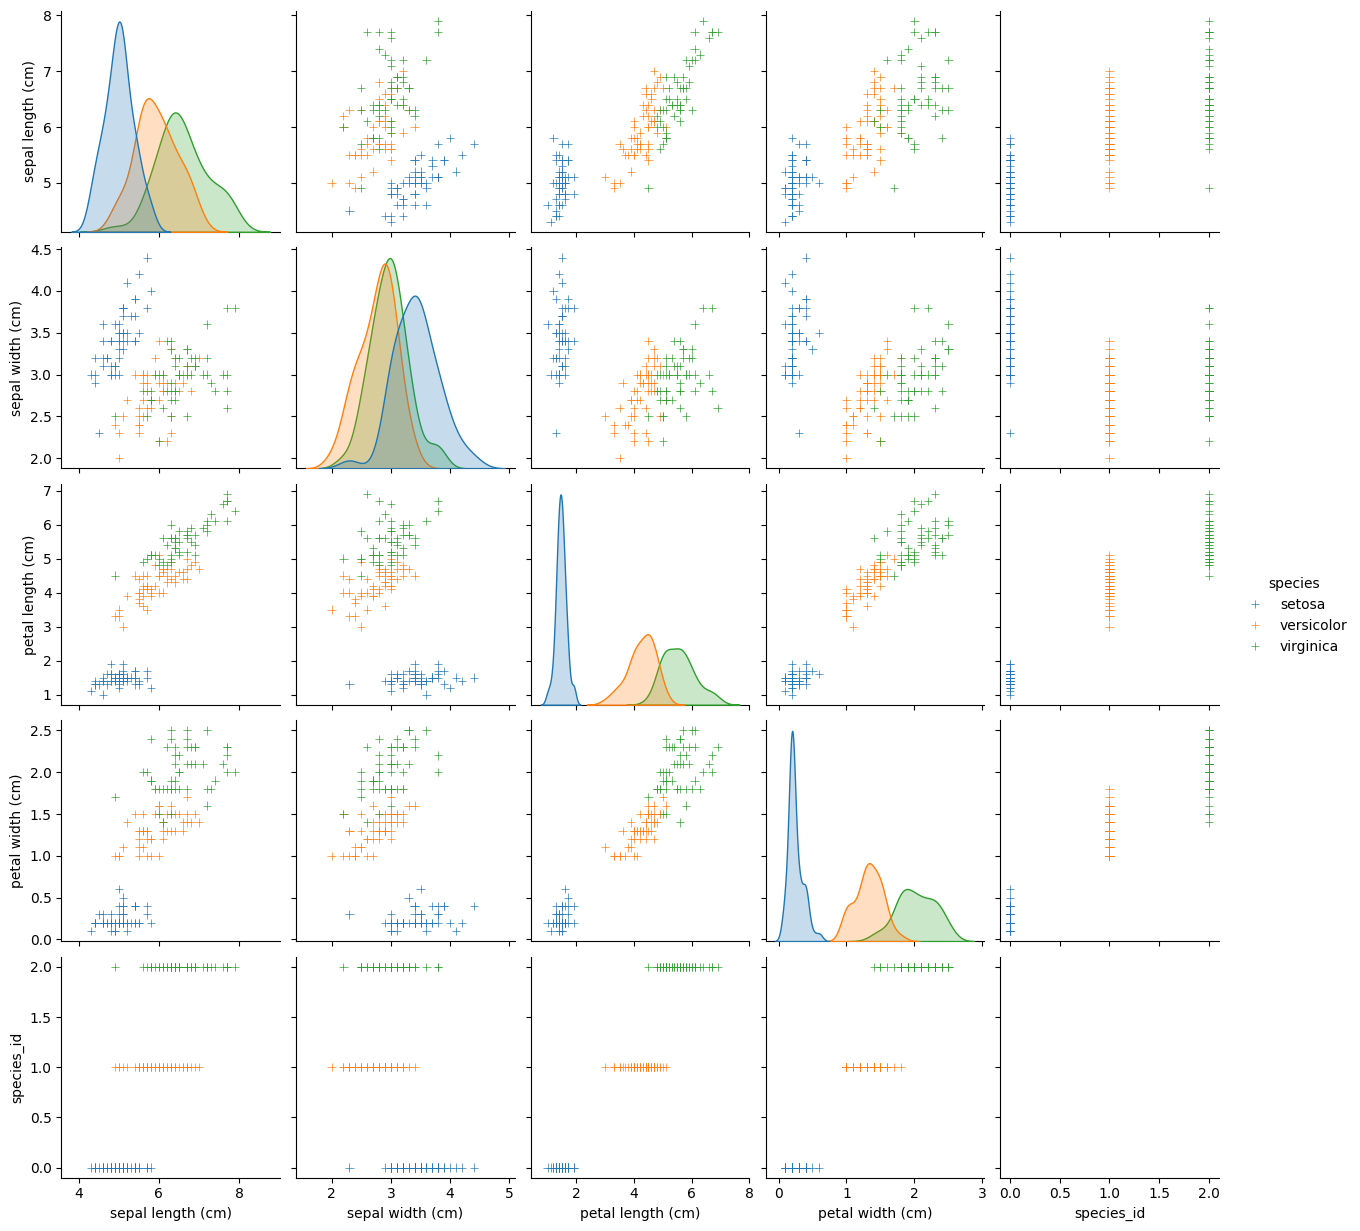

In [108]:
sns.pairplot(df, hue='species', markers='+')
plt.show()

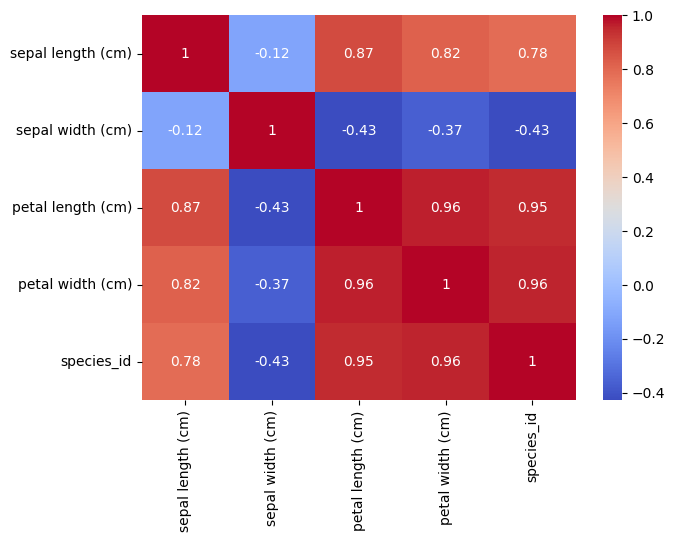

In [109]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

# Prepare the train and test data sets

In [110]:
X = df.drop(['species', 'species_id'], axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [112]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [113]:
y_train.head()

,species
81,versicolor
133,virginica
137,virginica
75,versicolor
109,virginica


In [114]:
def euclidean_distance(test_point, train_point):
  return np.sqrt(np.sum(np.array(test_point) - np.array(train_point)) ** 2)

In [115]:
def knn_simple(X_train, y_train, X_test_sample, k=3):
  distances = []
  for i in range(len(X_train)):
    dist = euclidean_distance(X_test_sample, X_train.iloc[i])
    distances.append((dist, y_train.iloc[i]))

  distances.sort(key= lambda x: x[0])
  distances = [label for _, label in distances[:k]]

  result = Counter(distances).most_common(1)[0][0]

  return result



In [116]:
count_correct = 0
for i in range(len(X_test)):
  test_point = X_test.iloc[i]
  predicted = knn_simple(X_train, y_train, test_point, 15)
  original = y_test.iloc[i]
  print(f"The predicted label for test {i} is : {predicted}")
  print(f"The original label is: {original}\n")
  count_correct = count_correct + 1 if predicted == original else count_correct
  i += 1

print(f"Total {count_correct} correct predictions out of {len(X_test)}")

The predicted label for test 0 is : versicolor
The original label is: versicolor

The predicted label for test 1 is : setosa
The original label is: setosa

The predicted label for test 2 is : virginica
The original label is: virginica

The predicted label for test 3 is : versicolor
The original label is: versicolor

The predicted label for test 4 is : virginica
The original label is: versicolor

The predicted label for test 5 is : setosa
The original label is: setosa

The predicted label for test 6 is : versicolor
The original label is: versicolor

The predicted label for test 7 is : virginica
The original label is: virginica

The predicted label for test 8 is : versicolor
The original label is: versicolor

The predicted label for test 9 is : versicolor
The original label is: versicolor

The predicted label for test 10 is : virginica
The original label is: virginica

The predicted label for test 11 is : setosa
The original label is: setosa

The predicted label for test 12 is : setosa
T

In [117]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')
print(metrics.classification_report(y_test, y_pred))


Model Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

